The E Coli Imbalanced Dataset

The dataset describes the problem of classifying E.coli proteins using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.

The dataset is credited to Kenta Nakai and was developed into its current form by Paul Horton and Kenta Nakai in their 1996 paper titled “A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.” In it, they achieved a classification accuracy of 81%.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

Ignoring the sequence name, the input features are described as follows:

mcg: McGeoch’s method for signal sequence recognition.

gvh: von Heijne’s method for signal sequence recognition.

lip: von Heijne’s Signal Peptidase II consensus sequence score.

chg: Presence of charge on N-terminus of predicted lipoproteins.

aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.

alm1: score of the ALOM membrane-spanning region prediction program.

alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

There are eight classes described as follows:

cp: cytoplasm

im: inner membrane without signal sequence

pp: periplasm

imU: inner membrane, non cleavable signal sequence

om: outer membrane

omL: outer membrane lipoprotein

imL: inner membrane lipoprotein

imS: inner membrane, cleavable signal sequence



Load libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load datasets

In [2]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ecoli.csv")
train.columns = ['mcg','gvh', 'lip','chg','aac','alm1','alm2', 'result']

In [3]:
train

,mcg,gvh,lip,chg,aac,alm1,alm2,result
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
...,...,...,...,...,...,...,...,...
330,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
331,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
332,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
333,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Check for null values

In [4]:
train.isnull().sum()

mcg       0
gvh       0
lip       0
chg       0
aac       0
alm1      0
alm2      0
result    0
dtype: int64

Graphical representation of data

Compare result with independant variables

In [5]:
result = train.groupby(by=("result")).sum().reset_index()
result

,result,mcg,gvh,lip,chg,aac,alm1,alm2
0,cp,51.50,58.30,68.16,71.0,64.43,44.47,56.17
1,im,36.84,38.24,37.48,38.5,41.28,58.33,56.24
2,imL,1.45,0.94,2.00,1.5,0.91,1.29,1.14
3,imS,1.48,1.02,0.96,1.0,1.07,1.28,1.14
4,imU,25.41,16.06,17.32,17.5,19.56,26.04,26.18
5,om,13.45,14.20,10.12,10.0,14.78,9.25,6.11
6,omL,3.49,2.56,5.00,2.5,2.71,2.82,1.11
7,pp,33.91,36.39,24.96,26.0,22.71,24.34,19.47


Label Encode result

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     335 non-null    float64
 1   gvh     335 non-null    float64
 2   lip     335 non-null    float64
 3   chg     335 non-null    float64
 4   aac     335 non-null    float64
 5   alm1    335 non-null    float64
 6   alm2    335 non-null    float64
 7   result  335 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train.result = le.fit_transform(train.result)
train.result

0      0
1      0
2      0
3      0
4      0
      ..
330    7
331    7
332    7
333    7
334    7
Name: result, Length: 335, dtype: int64

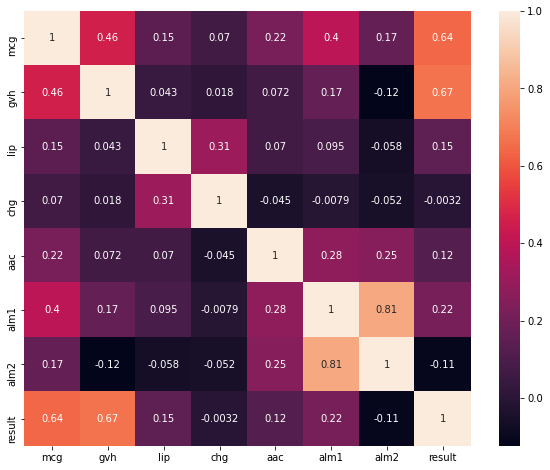

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

Count each class

In [9]:
import collections
from collections import Counter

counter = Counter(train.result)
for k,v in counter.items():
	per = v / len(train.result) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=142, Percentage=42.388%
Class=1, Count=77, Percentage=22.985%
Class=3, Count=2, Percentage=0.597%
Class=2, Count=2, Percentage=0.597%
Class=4, Count=35, Percentage=10.448%
Class=5, Count=20, Percentage=5.970%
Class=6, Count=5, Percentage=1.493%
Class=7, Count=52, Percentage=15.522%


In [10]:
result1=train.groupby("result").count().reset_index()
result1

,result,mcg,gvh,lip,chg,aac,alm1,alm2
0,0,142,142,142,142,142,142,142
1,1,77,77,77,77,77,77,77
2,2,2,2,2,2,2,2,2
3,3,2,2,2,2,2,2,2
4,4,35,35,35,35,35,35,35
5,5,20,20,20,20,20,20,20
6,6,5,5,5,5,5,5,5
7,7,52,52,52,52,52,52,52


Percentage of result

In [11]:
result2=train.groupby("result").count()/len(train)*100
result2

,mcg,gvh,lip,chg,aac,alm1,alm2
result,,,,,,,
0,42.388060,42.388060,42.388060,42.388060,42.388060,42.388060,42.388060
1,22.985075,22.985075,22.985075,22.985075,22.985075,22.985075,22.985075
2,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015
3,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015,0.597015
4,10.447761,10.447761,10.447761,10.447761,10.447761,10.447761,10.447761
5,5.970149,5.970149,5.970149,5.970149,5.970149,5.970149,5.970149
6,1.492537,1.492537,1.492537,1.492537,1.492537,1.492537,1.492537
7,15.522388,15.522388,15.522388,15.522388,15.522388,15.522388,15.522388


Graphical representation of result

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


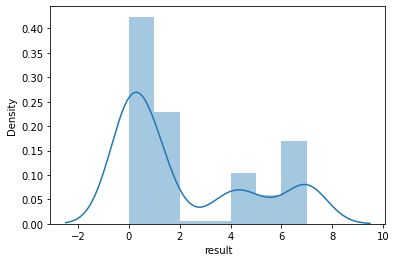

In [12]:
sns.distplot(train['result'])

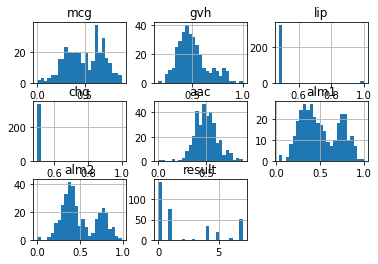

In [13]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
train.hist(bins=25)
# show the plot
pyplot.show()

Assign X and y variables

In [14]:
y = train.result
X = train.drop(['result'], axis = 1)

X.shape, y.shape

((335, 7), (335,))

Split training set up for training and validation

In [15]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=27, test_size=0.50, stratify=y)
#check shapes of testing data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((167, 7), (168, 7), (167,), (168,))

Scaler

In [16]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_val = scaler.transform(X_val)

Count values in validation set

In [17]:
from collections import Counter

print(Counter(y_val))


Counter({0: 71, 1: 39, 7: 26, 4: 18, 5: 10, 6: 2, 3: 1, 2: 1})


Class weights

In [18]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


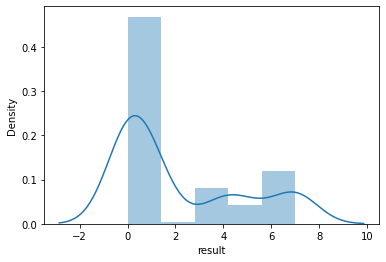

In [19]:
sns.distplot(y_val)

Define model

Logistic Regression

In [20]:
#Multi Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', 
                           solver='saga', class_weight= class_weights, max_iter=2000, C=100).fit(X_train, y_train)
print(lr_model.score(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


0.8982035928143712


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [21]:
lr_pred = lr_model.predict(X_val)
print(lr_model.score(X_val, y_val))

0.7678571428571429


In [22]:
print(Counter(lr_pred))

Counter({0: 66, 7: 30, 1: 27, 4: 19, 5: 11, 3: 10, 6: 5})


In [23]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, lr_pred)

array([[63,  5,  0,  0,  0,  0,  0,  3],
       [ 0, 21,  0,  7,  7,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  3, 12,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  1,  0, 22]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


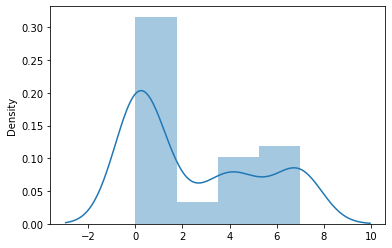

In [24]:
sns.distplot(lr_pred)

Statsmodels Logit

In [25]:
import statsmodels.discrete.discrete_model as sm

logit = sm.MNLogit(y_train, X_train).fit(method='bfgs', maxiter=1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: nan
         Iterations: 298
         Function evaluations: 316
         Gradient evaluations: 316


/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2227: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2228: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2227: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2228: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximu

In [26]:
X.corr()

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,1.000000,0.455961,0.146822,0.070258,0.220855,0.397660,0.167104
gvh,0.455961,1.000000,0.043194,0.018290,0.072147,0.169252,-0.123701
lip,0.146822,0.043194,1.000000,0.311938,0.070475,0.095368,-0.057992
chg,0.070258,0.018290,0.311938,1.000000,-0.044662,-0.007868,-0.052346
aac,0.220855,0.072147,0.070475,-0.044662,1.000000,0.281967,0.254009
alm1,0.397660,0.169252,0.095368,-0.007868,0.281967,1.000000,0.809124
alm2,0.167104,-0.123701,-0.057992,-0.052346,0.254009,0.809124,1.000000


In [27]:
yhat = logit.predict(X_val) 
pred = list(map(np.round, yhat)) 
pred = np.array(pred, dtype=np.int64)

In [28]:
pred = np.argmax(pred, axis=1)
pred[1]

0

In [29]:
from sklearn.metrics import (confusion_matrix, accuracy_score) 

print('Test accuracy = ', accuracy_score(y_val, pred))

Test accuracy =  0.8035714285714286


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


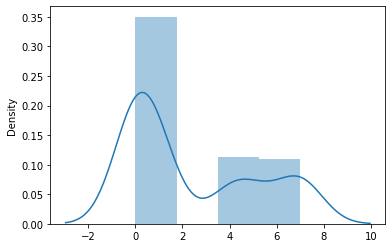

In [30]:
sns.distplot(pred)

In [31]:
print(Counter(pred))

Counter({0: 68, 1: 35, 7: 29, 4: 19, 5: 14, 6: 3})


In [32]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, pred)

array([[64,  4,  0,  0,  0,  1,  0,  2],
       [ 1, 26,  0,  0,  7,  2,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  5,  0,  0, 12,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  1,  0, 22]])

In [34]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':pred})
df

,Actual,Predicted
61,0,0
93,0,0
98,0,0
333,7,7
100,0,5
...,...,...
298,7,7
222,2,6
334,7,7
23,0,0


Random Forest Classifier

In [35]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, random_state=0, class_weight= class_weights).fit(X_train, y_train)
print(rf_model.score(X_train, y_train))

1.0


In [36]:
rf_pred = rf_model.predict(X_val)
print(rf_model.score(X_val, y_val))

0.8392857142857143


In [37]:
print(Counter(rf_pred))

Counter({0: 71, 1: 42, 7: 28, 4: 17, 5: 8, 6: 2})


In [38]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, rf_pred)

array([[67,  1,  0,  0,  0,  0,  0,  3],
       [ 0, 32,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  9,  0,  0,  9,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 23]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


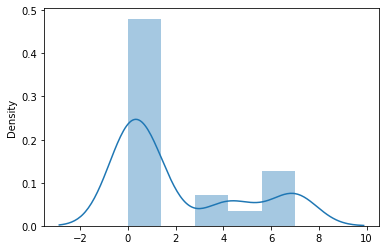

In [39]:
sns.distplot(rf_pred)

Decision Tree Classifier

In [40]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0, class_weight=class_weights).fit(X_train, y_train)
print(dt_model.score(X_train, y_train))

1.0


In [41]:
dt_pred = dt_model.predict(X_val)
print(dt_model.score(X_val, y_val))

0.7678571428571429


In [42]:
print(Counter(dt_pred))

Counter({0: 70, 1: 37, 7: 31, 4: 15, 5: 7, 6: 5, 3: 3})


In [43]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, dt_pred)

array([[66,  3,  0,  0,  0,  0,  0,  2],
       [ 0, 25,  0,  2,  8,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  9,  0,  1,  7,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 4,  0,  0,  0,  0,  0,  0, 22]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


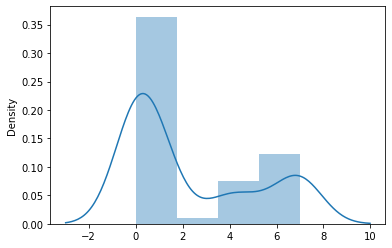

In [44]:
sns.distplot(dt_pred)

Extra Trees

In [45]:
#extra trees
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(random_state=0, class_weight=class_weights).fit(X_train, y_train)
print(et_model.score(X_train, y_train))

1.0


In [46]:
et_pred = et_model.predict(X_val)
print(et_model.score(X_val, y_val))

0.8511904761904762


In [47]:
print(Counter(et_pred))

Counter({0: 71, 1: 38, 7: 28, 4: 17, 5: 10, 6: 4})


In [48]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, et_pred)

array([[68,  0,  0,  0,  0,  0,  0,  3],
       [ 0, 31,  0,  0,  7,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  7,  0,  0, 10,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 23]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


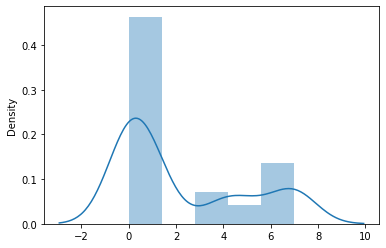

In [49]:
sns.distplot(et_pred)

Gradient Boost Classifier

In [50]:
#gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print(gb_model.score(X_train, y_train))

1.0


In [51]:
gb_pred = gb_model.predict(X_val)
print(gb_model.score(X_val, y_val))

0.7976190476190477


In [52]:
print(Counter(gb_pred))

Counter({0: 69, 1: 38, 7: 31, 4: 13, 5: 10, 6: 4, 3: 3})


In [53]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, gb_pred)

array([[66,  2,  0,  0,  0,  0,  0,  3],
       [ 0, 28,  0,  1,  6,  1,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  8,  0,  2,  7,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 23]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


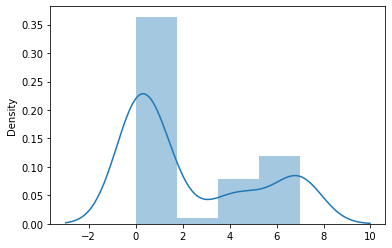

In [54]:
sns.distplot(gb_pred)

ADA Boost Classifier

In [55]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=0, class_weight=class_weights),
                               learning_rate=0.01, random_state=0).fit(X_train, y_train)
print(ada_model.score(X_train, y_train))

1.0


In [56]:
ada_pred = ada_model.predict(X_val)
print(ada_model.score(X_val, y_val))

0.8630952380952381


In [57]:
print(Counter(ada_pred))

Counter({0: 73, 1: 37, 7: 27, 4: 21, 5: 8, 6: 2})


In [58]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, ada_pred)

array([[69,  0,  0,  0,  0,  0,  0,  2],
       [ 0, 31,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  6,  0,  0, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 23]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


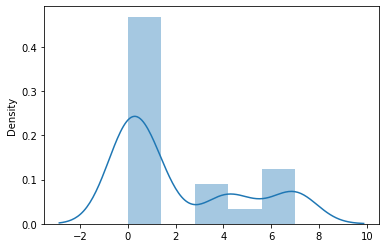

In [59]:
sns.distplot(ada_pred)

MLP Classifier

In [60]:
#mlpclassifier
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=0, max_iter=2000).fit(X_train, y_train)
print(mlp_model.score(X_train, y_train))

0.9820359281437125


In [61]:
mlp_pred = mlp_model.predict(X_val)
print(mlp_model.score(X_val, y_val))

0.7916666666666666


In [62]:
print(Counter(mlp_pred))

Counter({0: 69, 1: 41, 7: 27, 4: 16, 5: 10, 6: 5})


In [63]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, mlp_pred)

array([[66,  2,  0,  0,  0,  0,  0,  3],
       [ 0, 28,  0,  0, 10,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 11,  0,  0,  6,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  1,  0, 22]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


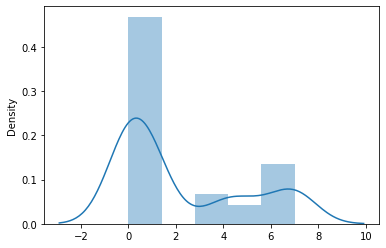

In [64]:
sns.distplot(mlp_pred)

Bagging Classifier

In [65]:
#bagging classifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bc_model = BaggingClassifier(base_estimator=SVC(class_weight=class_weights), n_estimators=10, random_state=0).fit(X_train, y_train)
print(bc_model.score(X_train, y_train))

0.8502994011976048


In [66]:
bc_pred = bc_model.predict(X_val)
print(bc_model.score(X_val, y_val))

0.8035714285714286


In [67]:
print(Counter(bc_pred))

Counter({0: 71, 1: 29, 7: 26, 4: 13, 5: 11, 3: 9, 2: 7, 6: 2})


In [68]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, bc_pred)

array([[68,  1,  0,  0,  0,  0,  0,  2],
       [ 0, 24,  6,  6,  3,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  3,  1,  3, 10,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  1,  0, 22]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


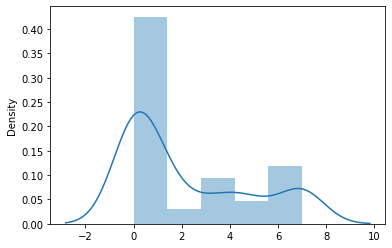

In [69]:
sns.distplot(bc_pred)

GaussianNB

In [70]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model.score(X_train, y_train))

0.8682634730538922


In [71]:
gnb_pred = gnb_model.predict(X_val)
print(gnb_model.score(X_val, y_val))

0.8095238095238095


In [72]:
print(Counter(gnb_pred))

Counter({0: 71, 7: 31, 1: 29, 4: 29, 5: 6, 6: 2})


In [73]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, gnb_pred)

array([[67,  2,  0,  0,  0,  0,  0,  2],
       [ 0, 25,  0,  0, 13,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 16,  1,  0,  0],
       [ 1,  1,  0,  0,  0,  3,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 23]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


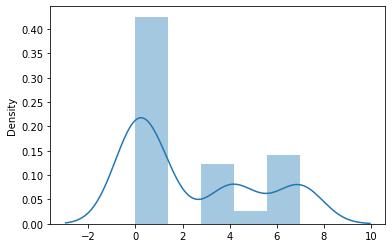

In [74]:
sns.distplot(gnb_pred)

XGB Classifier

In [75]:
#xgb classifier
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)
print(xgb_model.score(X_train, y_train))

1.0


In [76]:
xgb_pred = xgb_model.predict(X_val)
print(xgb_model.score(X_val, y_val))

0.8214285714285714


In [77]:
print(Counter(xgb_pred))

Counter({0: 69, 1: 36, 7: 32, 4: 20, 5: 9, 6: 2})


In [78]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, xgb_pred)

array([[66,  1,  0,  0,  0,  0,  0,  4],
       [ 0, 28,  0,  0,  8,  1,  0,  2],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  7,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 23]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


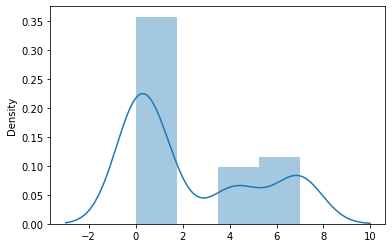

In [79]:
sns.distplot(xgb_pred)